<a href="https://colab.research.google.com/github/Niko1909/PyTorch-Tutorial/blob/main/torch_tutorial_ch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial

In [ ]:
import torch
from torch import nn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

torch.__version__

'2.4.1+cu121'

In [ ]:
weight = 0.7
bias = 0.3
start = 0
end = 1
step = 0.02
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = X * weight + bias
X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [ ]:
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  plt.scatter(train_data, train_labels, c='b', s=4, label='training data')
  plt.scatter(test_data, test_labels, c='g', s=4, label='test data')

  if predictions is not None:
    plt.scatter(test_data, predictions, c='r', s=4, label='predictions on test data')

  plt.legend(prop={'size': 14})
  return

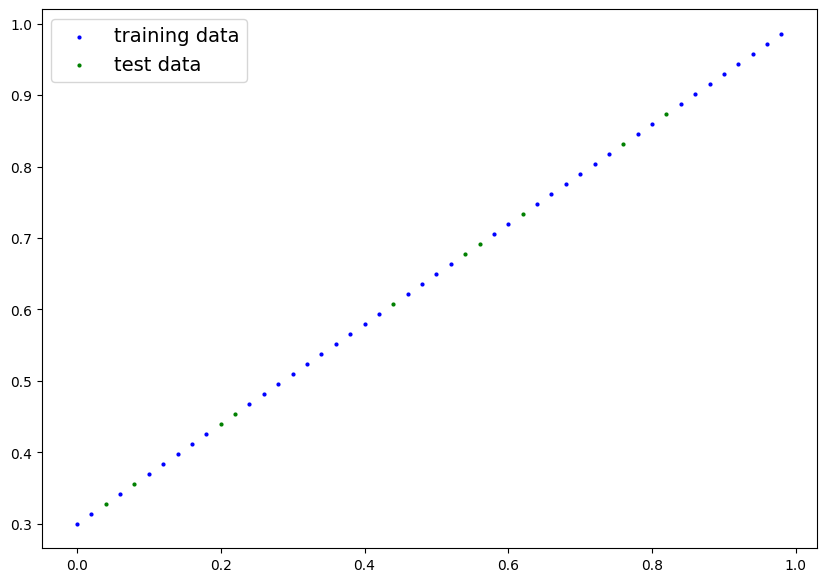

In [ ]:
plot_predictions()

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias


In [ ]:
torch.manual_seed(42)
model0 = LinearRegressionModel()
model0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

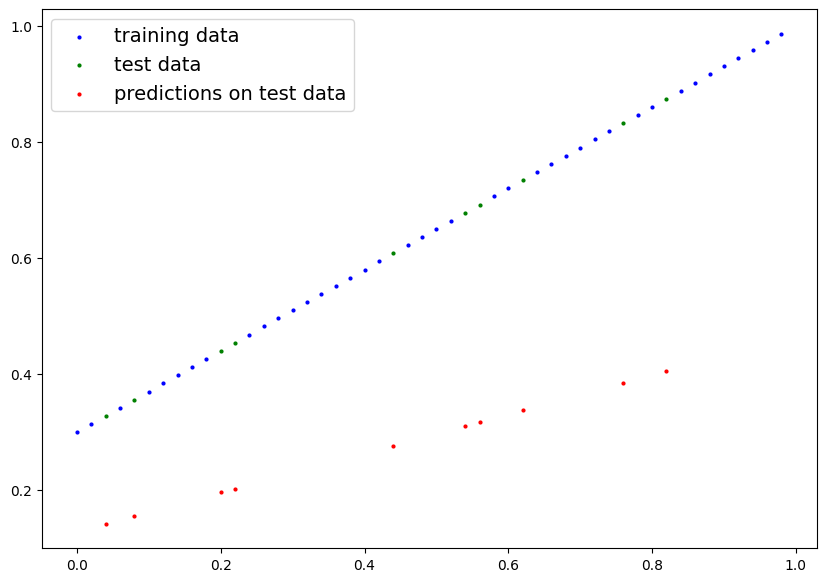

In [ ]:
with torch.no_grad():
  preds = model0(X_test)
plot_predictions(predictions=preds)

In [ ]:
# training
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model0.parameters(), lr=0.01)

In [ ]:
train_loss_values = []
test_loss_values = []
epoch_list = []

epochs = 201
for epoch in range(epochs):
  model0.train()
  y_pred = model0(X_train)
  loss = loss_fn(y_pred, y_train)

  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model0.eval()
  with torch.no_grad():
    test_pred = model0(X_test)
    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
      epoch_list.append(epoch)
      train_loss_values.append(loss.item())
      test_loss_values.append(test_loss.item())
      print(f"epoch: {epoch} | train loss: {loss} | test loss: {test_loss}")


epoch: 0 | train loss: 0.3548435568809509 | test loss: 0.3145235478878021
epoch: 10 | train loss: 0.2292904555797577 | test loss: 0.1928880661725998
epoch: 20 | train loss: 0.1091642752289772 | test loss: 0.08336130529642105
epoch: 30 | train loss: 0.05845985561609268 | test loss: 0.05181314796209335
epoch: 40 | train loss: 0.047578632831573486 | test loss: 0.04278183355927467
epoch: 50 | train loss: 0.04211265593767166 | test loss: 0.037698663771152496
epoch: 60 | train loss: 0.036971401423215866 | test loss: 0.032977424561977386
epoch: 70 | train loss: 0.03183014318346977 | test loss: 0.028256157413125038
epoch: 80 | train loss: 0.02668888494372368 | test loss: 0.02364099957048893
epoch: 90 | train loss: 0.021547632291913033 | test loss: 0.019117575138807297
epoch: 100 | train loss: 0.01640637218952179 | test loss: 0.0148529764264822
epoch: 110 | train loss: 0.011292176321148872 | test loss: 0.010019239969551563
epoch: 120 | train loss: 0.006177160888910294 | test loss: 0.00518550584

In [ ]:
model0.state_dict()

OrderedDict([('weights', tensor([0.7042])), ('bias', tensor([0.3088]))])

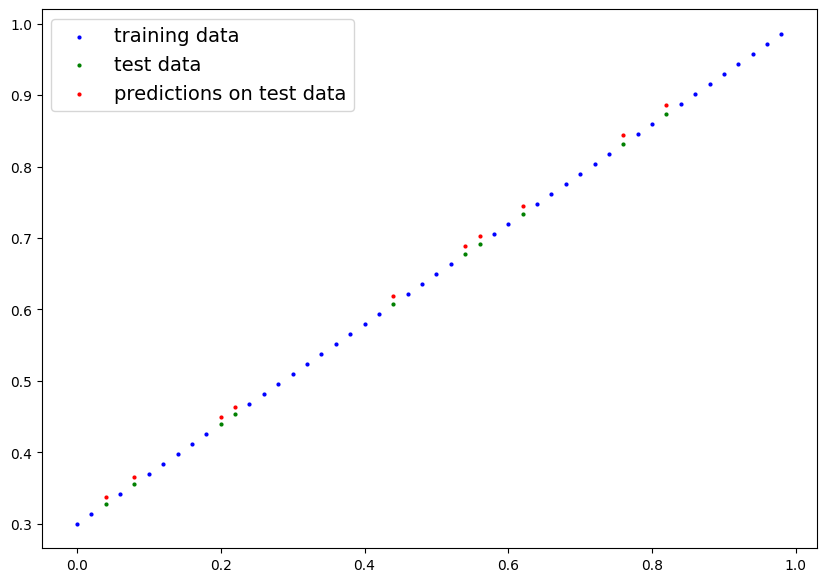

In [ ]:
with torch.no_grad():
  preds = model0(X_test)
plot_predictions(predictions=preds)

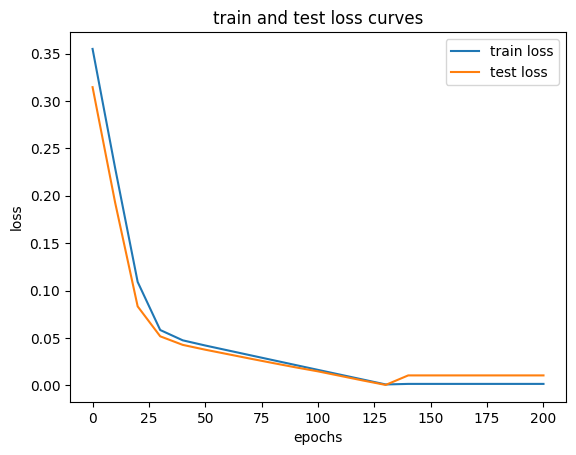

In [ ]:
plt.plot(epoch_list, train_loss_values, label='train loss')
plt.plot(epoch_list, test_loss_values, label='test loss')
plt.title('train and test loss curves')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend();

In [ ]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME = "01_pytorch_workflow_model_0.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

torch.save(obj=model0.state_dict(), f=MODEL_SAVE_PATH)

In [ ]:
MODEL_SAVE_PATH

PosixPath('models/01_pytorch_workflow_model_0.pth')

In [ ]:
loaded_model = LinearRegressionModel()
loaded_model.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))
loaded_model.state_dict()

OrderedDict([('weights', tensor([0.7042])), ('bias', tensor([0.3088]))])

# Exercises


In [ ]:
weight = 0.3
bias = 0.9
start = 0
end = 1
step = 0.01
X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

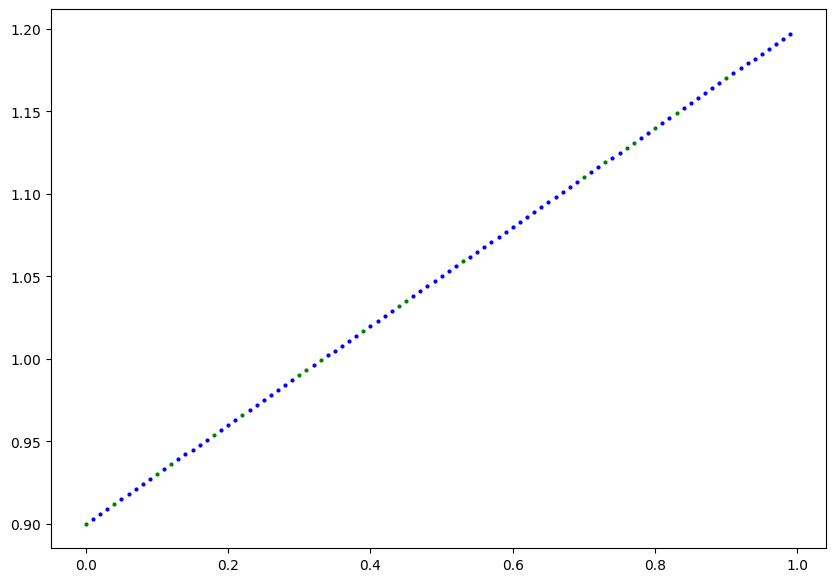

In [ ]:
plt.figure(figsize=(10,7))
plt.scatter(X_train, y_train, s=4, c='b')
plt.scatter(X_test, y_test, s=4, c='g')

In [ ]:
class LinearModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    return self.linear(x)


In [ ]:
torch.manual_seed(0)
model1 = LinearModel()
model1.state_dict()

OrderedDict([('linear.weight', tensor([[-0.0075]])),
             ('linear.bias', tensor([0.5364]))])

In [ ]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(model1.parameters(), lr=0.01)

In [ ]:
epochs = 300
for epoch in range(epochs):
  model1.train()
  y_pred = model1(X_train)
  loss = loss_fn(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if epoch % 20 == 0:
    model1.eval()
    with torch.no_grad():
      test_pred = model1(X_test)
      test_loss = loss_fn(test_pred, y_test)
      print(f'epoch {epoch} | train loss: {loss} test loss: {test_loss}')

epoch 0 | train loss: 0.5196059346199036 test loss: 0.4881296753883362
epoch 20 | train loss: 0.26809489727020264 test loss: 0.2429623305797577
epoch 40 | train loss: 0.03211245313286781 test loss: 0.0253827515989542
epoch 60 | train loss: 0.0139179527759552 test loss: 0.014714857563376427
epoch 80 | train loss: 0.004426456987857819 test loss: 0.004323786590248346
epoch 100 | train loss: 0.007631777785718441 test loss: 0.004495847038924694
epoch 120 | train loss: 0.007631777785718441 test loss: 0.004495847038924694
epoch 140 | train loss: 0.007631777785718441 test loss: 0.004495847038924694
epoch 160 | train loss: 0.007631777785718441 test loss: 0.004495847038924694
epoch 180 | train loss: 0.007631777785718441 test loss: 0.004495847038924694
epoch 200 | train loss: 0.007631777785718441 test loss: 0.004495847038924694
epoch 220 | train loss: 0.007631777785718441 test loss: 0.004495847038924694
epoch 240 | train loss: 0.007631777785718441 test loss: 0.004495847038924694
epoch 260 | train

In [ ]:
model1.state_dict()

OrderedDict([('linear.weight', tensor([[0.2979]])),
             ('linear.bias', tensor([0.9087]))])

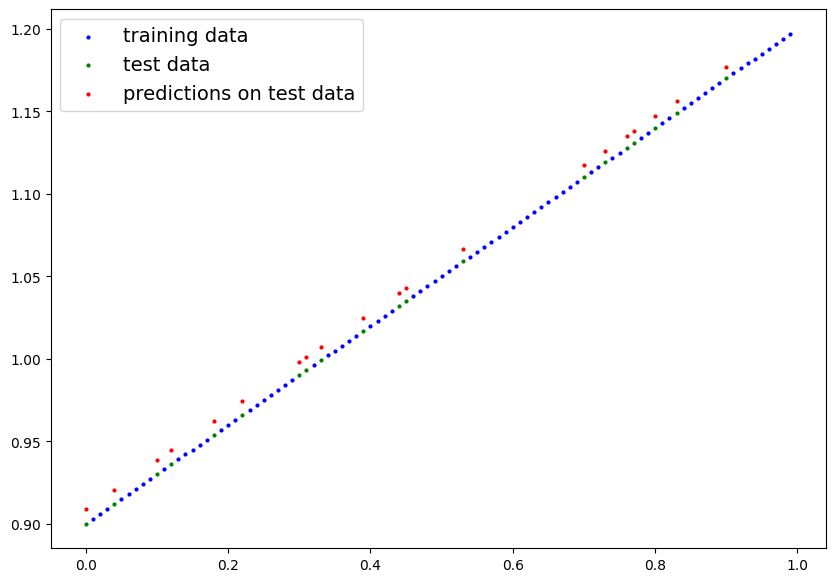

In [ ]:
with torch.no_grad():
  test_pred = model1(X_test)
  plot_predictions(X_train, y_train, X_test, y_test, test_pred)

In [ ]:
MODEL_NAME = "exercise_model.pth"
MODEL_SAVE_PATH =  MODEL_PATH / MODEL_NAME

torch.save(model1.state_dict(), f=MODEL_SAVE_PATH)
MODEL_SAVE_PATH

PosixPath('models/exercise_model.pth')

In [ ]:
model2 = LinearModel()
model2.load_state_dict(torch.load(f=MODEL_SAVE_PATH, weights_only=True))

<All keys matched successfully>

In [ ]:
with torch.no_grad():
  test2_pred = model2(X_test)
all(test_pred == test2_pred)

True